# **Using multivariate polynomial regression to predict joint movement of robotic arm to improve the accuracy of movement simulations.**

## Problem statement

**WHAT?**

🔍 We aim to develop a regression model that predicts the 6-joint configurations (joint coordination) of an ABB robotic arm during 3D clay printing, based on simulated toolpath data and actual printed movement data.

**WHY?**

🎯 To identify and learn the discrepancies between simulated and real joint movements, enabling more accurate motion planning, error correction, and improved robotic fabrication outcomes.

**HOW?**

🛠️ By collecting and preprocessing joint angle data from Rhino-modeled toolpaths, RoboStudio simulations, and post-printing movements, we train a regression model through polynomial or linear regression to predict joint values for given toolpath positions, enabling us to analyze, anticipate and prospectively refine robotic motion.

## imports

In [133]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Datasets

In [134]:
# loading simulation data

sim_df_1 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_marcos.csv')
sim_df_2 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_Yashashvy.csv')
sim_df_3 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/digital_output_misra.csv')

# loading data from real robotic movement

real_df_1 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/Recording-1-marcos.csv')
real_df_2 = pd.read_csv('/home/salvador_cb/ai_for_robotic_fabrication/data/Recording-1-Yashashvy.csv')

In [135]:
train_df = pd.concat([sim_df_1, sim_df_2], ignore_index=True)

## Defining features and target

In [136]:
X = train_df[['J1', 'J2', 'J3', 'J4', 'J5']].values
y = train_df['J6'].values

## Training the model

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

In [139]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

## Validating the model

In [140]:
new_data = real_df_1[['J1', 'J2', 'J3', 'J4', 'J5']].values
new_data_scaled = scaler.transform(new_data)
new_data_poly = poly.transform(new_data_scaled)

In [141]:
predicted_j6 = model.predict(new_data_poly)
actual_j6 = real_df_1['J6'].values

# new df with predicted and actual values
df = pd.DataFrame({'actual': actual_j6, 'predicted': predicted_j6})

## Plotting

In [142]:
df

,actual,predicted
0,0.290,-136.924756
1,0.289,-136.992001
2,0.289,-137.049666
3,0.289,-137.119563
4,0.289,-137.182632
...,...,...
23985,-2.412,-143.305510
23986,-2.411,-143.352284
23987,-2.409,-143.400628
23988,-2.407,-143.444901


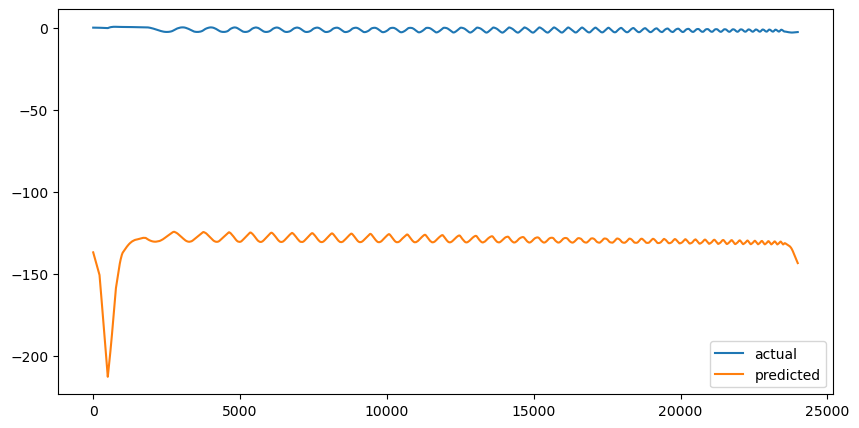

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(df['actual'], label='actual')
plt.plot(df['predicted'], label='predicted')
plt.legend()
